In [1]:
import glob
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# compute bins for Asym, slit

bins = [0.3, 0.5, 0.6, 0.7 ,0.9, 1]
Exp = ['asymmetric_wings', 'Slit_sc']
#        ,'epi_ridge_cut']
for ex in Exp:
    df = pd.read_csv('../dataFolder/AmplitudeAnalysis/v2/' + ex + '/median_summary.csv')
    if 'binned' not in df.columns:
        df['binned'] = pd.cut(df['winglength'], bins)
        df.to_csv('../dataFolder/AmplitudeAnalysis/v2/' + ex + '/median_summary.csv')

In [15]:
pal = {'RW': '#231f20', 'LW': '#ed1c24'}

boxprops = {'edgecolor': 'k', 'linewidth': 2,'alpha': 0.5}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

# Set up some general kwargs that we'll use in both the stripplot and boxplot
# Note that you can change the order of hue variables here.
kwargs = {'palette': pal, 'hue_order': ['LW', 'RW']}

# The boxplot kwargs get passed to matplotlib's boxplot function.
# Note how we can re-use our lineprops dict to make sure all the lines
# match. You could also edit each line type (e.g. whiskers, caps, etc)
# separately.
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.75},
                      **kwargs
                     )
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.7},
                        **kwargs
                       )

### Haltere loading

In [4]:
df = pd.read_csv('../dataFolder/AmplitudeAnalysis/v2/haltere_loading/median_summary.csv')
df = df.rename(columns={"winglength": "treatment"})

# drop the haltere values 
i1 = df.loc[(df.body == 'LH')].index
i2 = df.loc[(df.body == 'RH')].index
indexNames = list(i1) + list(i2)
df.drop(indexNames, inplace = True)
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
df.head()

,flyID,body,med_amplitude,treatment
1,fly1,LW,158.869661,intacthalteres
3,fly1,RW,156.706477,intacthalteres
5,fly1,LW,150.092814,loadedhaltere1
7,fly1,RW,154.035367,loadedhaltere1
9,fly1,LW,138.465456,loadedhaltere2


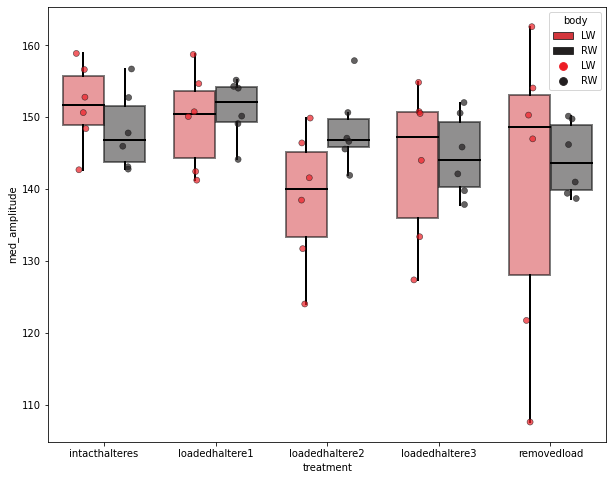

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax = ax, x = 'treatment', y = 'med_amplitude', hue = 'body', data = df,
           order = ['intacthalteres', 'loadedhaltere1', 'loadedhaltere2', 'loadedhaltere3', 'removedload'],
           fliersize=0, **boxplot_kwargs)
sns.stripplot(ax = ax, x = 'treatment', y = 'med_amplitude', hue = 'body', data = df,
              order = ['intacthalteres', 'loadedhaltere1', 'loadedhaltere2', 'loadedhaltere3', 'removedload'],
              dodge=True, **stripplot_kwargs)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/haltere_loading_MedWBA.pdf')

### Epi Ridge

In [8]:
# compute bins for epi ridge data

bins = [0.3, 0.4, 0.5, 0.6, 0.7 ,0.9, 1]
Exp = ['epi_ridge_cut']
for ex in Exp:
    df = pd.read_csv('../dataFolder/AmplitudeAnalysis/v2/' + ex + '/median_summary.csv')
    if 'binned' not in df.columns:
        df['binned'] = pd.cut(df['winglength'], bins)
        df.to_csv('../dataFolder/AmplitudeAnalysis/v2/' + ex + '/median_summary.csv')

In [2]:
df = pd.read_csv('../dataFolder/AmplitudeAnalysis/v2/epi_ridge_cut/median_summary.csv')
df = df.rename(columns={"winglength": "treatment"})

# drop the haltere values 
i1 = df.loc[(df.body == 'LH')].index
i2 = df.loc[(df.body == 'RH')].index
indexNames = list(i1) + list(i2)
df.drop(indexNames, inplace = True)
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df.flyID.unique()

array(['fly1', 'fly2', 'fly3', 'fly5', 'fly7', 'fly8', 'fly9'],
      dtype=object)

In [12]:
#drop fly 8 and 9

df.drop(df.loc[df.flyID.isin(['fly8', 'fly9']), :].index, inplace = True)

In [13]:
df.head()

,Unnamed: 0.1,flyID,body,med_amplitude,treatment,binned
1,1,fly1,LW,86.794979,0.38,"(0.3, 0.4]"
3,3,fly1,RW,107.727884,0.38,"(0.3, 0.4]"
5,5,fly1,LW,95.382313,0.50,"(0.4, 0.5]"
7,7,fly1,RW,108.199737,0.50,"(0.4, 0.5]"
9,9,fly1,LW,121.218422,0.58,"(0.5, 0.6]"


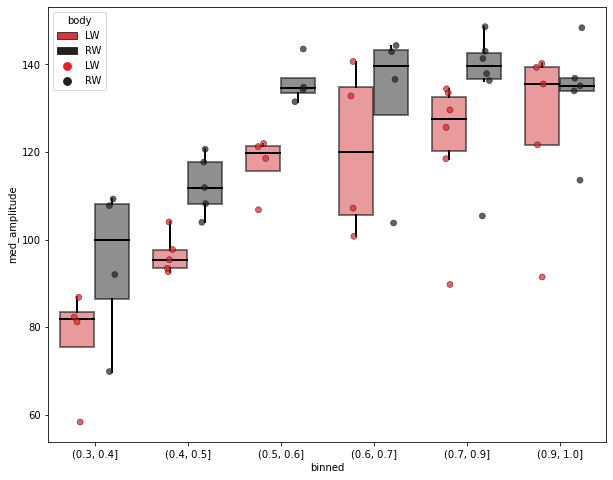

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax = ax, x = 'binned', y = 'med_amplitude', hue = 'body', data = df,
           order = ['(0.3, 0.4]', '(0.4, 0.5]', '(0.5, 0.6]' ,'(0.6, 0.7]', '(0.7, 0.9]', '(0.9, 1.0]'],
            fliersize=0,
            **boxplot_kwargs
           )target 
sns.stripplot(ax = ax, x = 'binned', y = 'med_amplitude', hue = 'body', data = df,
              order = ['(0.3, 0.4]', '(0.4, 0.5]', '(0.5, 0.6]' ,'(0.6, 0.7]', '(0.7, 0.9]', '(0.9, 1.0]'],
           dodge=True, 
              **stripplot_kwargs
             )
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/epi_ridge_cut_MedWBA_withoutFly8&9.pdf')

### asymmetric wings

In [12]:
pal = {'intact': '#231f20', 'clip': '#ed1c24'}

boxprops = {'edgecolor': 'k', 'linewidth': 2,'alpha': 0.5}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

# Set up some general kwargs that we'll use in both the stripplot and boxplot
# Note that you can change the order of hue variables here.
kwargs = {'palette': pal, 'hue_order': ['clip', 'intact']}

# The boxplot kwargs get passed to matplotlib's boxplot function.
# Note how we can re-use our lineprops dict to make sure all the lines
# match. You could also edit each line type (e.g. whiskers, caps, etc)
# separately.
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.75},
                      **kwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.7},
                        **kwargs)

In [13]:
df = pd.read_csv('../dataFolder/AmplitudeAnalysis/v2/asymmetric_wings/median_summary.csv')
df = df.rename(columns={"winglength": "treatment"})

# drop the haltere values 
i1 = df.loc[(df.body == 'LH')].index
i2 = df.loc[(df.body == 'RH')].index
indexNames = list(i1) + list(i2)
df.drop(indexNames, inplace = True)

In [14]:
df.head()

,Unnamed: 0,Unnamed: 0.1,flyID,body,med_amplitude,treatment,binned
0,0,0,fly1,LW,106.300374,0.391743,"(0.3, 0.5]"
1,1,1,fly1,RW,141.388610,0.391743,"(0.3, 0.5]"
2,2,2,fly1,LW,108.509719,0.461742,"(0.3, 0.5]"
3,3,3,fly1,RW,137.794417,0.461742,"(0.3, 0.5]"
4,4,4,fly1,LW,129.176719,0.573657,"(0.5, 0.6]"


In [15]:
table = pd.read_csv('../dataFolder/AmplitudeAnalysis/v2/asymmetric_wings/Readme_leftRightWingClipped.txt', 
                   delimiter = "\t")
table
# mapping_dict = table.set_index('name').T.to_dict('index')['clippedWing']
# mapping_dict

,name,clippedWing
0,fly1,LW
1,fly2,LW
2,fly3,LW
3,fly5,RW
4,fly6,RW
5,fly7,RW


In [16]:
bodypart = []
for r, line in df.iterrows():
    ref = table[table.name == line.flyID]
    if line.body == ref.clippedWing.values[0]:
        bp = 'clip'
    else:
        bp = 'intact'
    bodypart.append(bp)

In [17]:
df['bodypart'] = bodypart

In [18]:
df

,Unnamed: 0,Unnamed: 0.1,flyID,body,med_amplitude,treatment,binned,bodypart
0,0,0,fly1,LW,106.300374,0.391743,"(0.3, 0.5]",clip
1,1,1,fly1,RW,141.388610,0.391743,"(0.3, 0.5]",intact
2,2,2,fly1,LW,108.509719,0.461742,"(0.3, 0.5]",clip
3,3,3,fly1,RW,137.794417,0.461742,"(0.3, 0.5]",intact
4,4,4,fly1,LW,129.176719,0.573657,"(0.5, 0.6]",clip
...,...,...,...,...,...,...,...,...
57,57,57,fly7,RW,142.443988,0.707680,"(0.7, 0.9]",clip
58,58,58,fly7,LW,140.867385,0.770075,"(0.7, 0.9]",intact
59,59,59,fly7,RW,128.026597,0.770075,"(0.7, 0.9]",clip
60,60,60,fly7,LW,127.758904,1.000000,"(0.9, 1.0]",intact


In [19]:
df.to_csv('../dataFolder/AmplitudeAnalysis/v2/asymmetric_wings/median_summary_edited.csv')

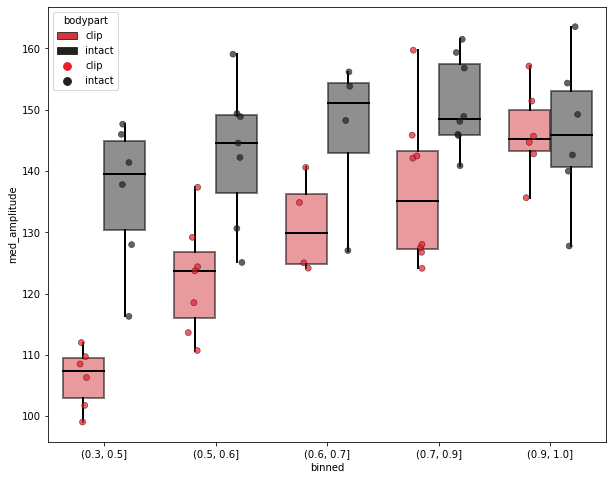

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax = ax, x = 'binned', y = 'med_amplitude', hue = 'bodypart', data = df,
           fliersize=0, **boxplot_kwargs)
sns.stripplot(ax = ax, x = 'binned', y = 'med_amplitude', hue = 'bodypart', data = df,
           dodge=True, **stripplot_kwargs)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/asymmetric_wings_MedWBA.pdf')

### slit sc

In [21]:
df = pd.read_csv('../dataFolder/AmplitudeAnalysis/v2/slit_sc/median_summary.csv')
df = df.rename(columns={"winglength": "treatment"})

# drop the haltere values 
i1 = df.loc[(df.body == 'LH')].index
i2 = df.loc[(df.body == 'RH')].index
indexNames = list(i1) + list(i2)
df.drop(indexNames, inplace = True)

In [22]:
table = pd.read_csv('../dataFolder/AmplitudeAnalysis/v1/slit_sc/Readme_leftRightWingClipped.txt', 
                   delimiter = "\t")
table

,name,clippedWing
0,fly1,LW
1,fly2,LW
2,fly7,RW
3,fly8,RW
4,fly9,LW


In [23]:
bodypart = []
for r, line in df.iterrows():
    ref = table[table.name == line.flyID]
    if line.body == ref.clippedWing.values[0]:
        bp = 'clip'
    else:
        bp = 'intact'
    bodypart.append(bp)
df['bodypart'] = bodypart

In [24]:
df.head()

,Unnamed: 0,Unnamed: 0.1,flyID,body,med_amplitude,treatment,binned,bodypart
0,0,0,fly1,LW,103.677600,0.450367,"(0.3, 0.5]",clip
1,1,1,fly1,RW,96.487214,0.450367,"(0.3, 0.5]",intact
2,2,2,fly1,LW,148.977524,0.617825,"(0.6, 0.7]",clip
3,3,3,fly1,RW,114.640444,0.617825,"(0.6, 0.7]",intact
4,4,4,fly1,LW,150.204065,0.719372,"(0.7, 0.9]",clip


In [25]:
df.to_csv('../dataFolder/AmplitudeAnalysis/v2/slit_sc/median_summary_edited.csv')

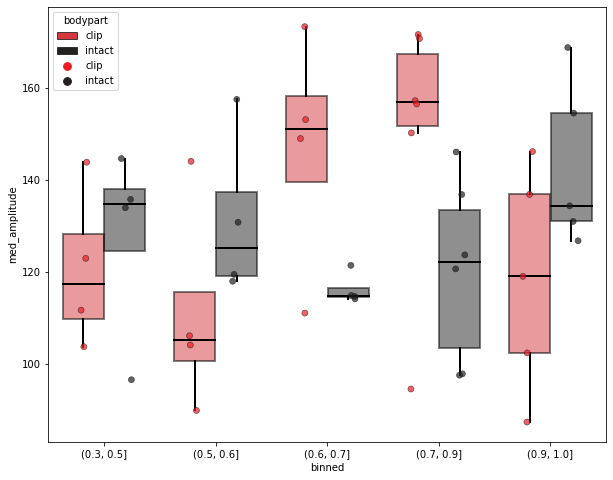

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax = ax, x = 'binned', y = 'med_amplitude', hue = 'bodypart', data = df,
           fliersize=0, **boxplot_kwargs,
           order = ['(0.3, 0.5]', '(0.5, 0.6]', '(0.6, 0.7]', '(0.7, 0.9]', '(0.9, 1.0]'])
sns.stripplot(ax = ax, x = 'binned', y = 'med_amplitude', hue = 'bodypart', data = df,
           dodge=True, **stripplot_kwargs,
             order = ['(0.3, 0.5]', '(0.5, 0.6]', '(0.6, 0.7]', '(0.7, 0.9]', '(0.9, 1.0]'])
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/Slit_sc_MedWBA.pdf')